In [2]:
#imports
import pandas as pd
import numpy as np
from PIL import Image
np.set_printoptions(linewidth=155)


In [3]:
input_file = "/content/drive/Shareddrives/CMPE 255 - Team Project/A_Z Handwritten Data.csv"
Handwrittendata = pd.read_csv(input_file, header = 0)


In [4]:
Handwrittendata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [5]:
Handwrittendata.iloc[:,0].value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: 0, dtype: int64

In [6]:
row1 = Handwrittendata.iloc[16290,:].values

row1 = row1[0:784]

print(row1)
print(type(row1))
print(row1.shape)

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 224   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  10  87 188 226 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44 167 177
  51 223 137   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5 113 206 118   0  83 255  20   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  25 142 206  44   0   0 191 102  

In [7]:
mat1 = np.resize(row1,(28,28))

In [8]:
print(mat1)

[[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 224   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  87 188 226 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44 167 177  51 223 137   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5 113 206 118   0  83 255  20   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 142 206  4

In [9]:
im = Image.fromarray(mat1.astype(np.uint8))

In [10]:
im

In [11]:
#Load other modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [12]:
#load the datasets
import pandas as pd

train_file ="/content/drive/Shareddrives/CMPE 255 - Team Project/train.csv"
train= pd.read_csv(train_file, header = 0)

#train = pd.read_csv("train.csv", header= None, na_values="?")

#test = pd.read_csv("test.csv", header= None, na_values="?")

#train = pd.read_csv("/content/A_Z Handwritten Data.csv", header= None, na_values="?")

#test = pd.read_csv("/content/A_Z Handwritten Data.csv", header=None, na_values="?")

In [13]:
#check few rows
train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#train[0].value_counts()

In [15]:
#train[1].value_counts()

In [16]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [17]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

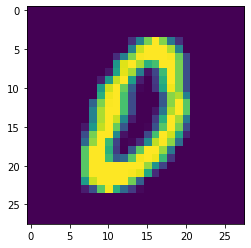

In [18]:
print_image(1, df_x)

In [19]:
#Check the frequency of each number
df_y.value_counts().sort_index()

0     11074
1      6968
2     18705
3      8058
4      9234
5       937
6      4658
7      5721
8       900
9      6817
10     4460
11     9301
12     9835
13    15156
14    46266
15    15577
16     4602
17     9196
18    38778
19    18003
20    23198
21     3311
22     8657
23     5028
24     8665
25     4855
Name: 0, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


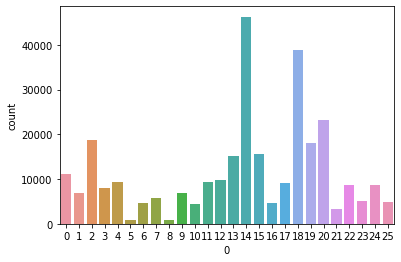

In [20]:
sns.countplot(df_y)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
len(X_train)
len(X_test)

(208572, 784)
(89388, 784)


89388

In [23]:
#training random Forest
#removed y_train bcz we dont need label
#iloc[:,1:] taking all the rows expect the label colum 
#X_train.iloc[:,0] contains only label colum 
#rf.fit(X_train.iloc[:,1:],X_train.iloc[:,0])
rf= RandomForestClassifier(n_estimators=50)
rf.fit(df_x,df_y)


RandomForestClassifier(n_estimators=50)

In [24]:
test_file ="/content/drive/Shareddrives/CMPE 255 - Team Project/test.csv"
test= pd.read_csv(test_file, header = 0)


In [25]:
test_df_x = test.iloc[:,1:]
test_df_y = test.iloc[:,0]

In [26]:
pred= rf.predict(test.iloc[:,1:])
print(pred)

#printing the label for comparision 
print(test.iloc[0,0])
print ("Classification Report")

#print(classification_report(y_test, pred))
#print ("Confusion Report")
#print(confusion_matrix(y_test, pred))

[17 14  2 ... 18 23 19]
17
Classification Report


In [28]:
#pred.value_counts()

In [29]:
rf.score(test_df_x,test_df_y)

0.9868304470398711

In [30]:
alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

print(classification_report(test_df_y, pred, target_names=alphabet))

#print(classification_report(test_df_y, pred, labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']))


              precision    recall  f1-score   support

           A       0.97      0.99      0.98      2795
           B       0.98      0.97      0.98      1700
           C       0.99      0.99      0.99      4704
           D       0.97      0.97      0.97      2076
           E       0.99      0.99      0.99      2206
           F       1.00      0.94      0.97       226
           G       0.99      0.97      0.98      1104
           H       0.98      0.95      0.97      1497
           I       1.00      0.93      0.96       220
           J       0.99      0.98      0.98      1676
           K       0.97      0.96      0.97      1143
           L       0.99      0.99      0.99      2285
           M       0.98      0.98      0.98      2501
           N       0.97      0.99      0.98      3854
           O       0.99      1.00      0.99     11559
           P       0.99      0.99      0.99      3764
           Q       0.99      0.95      0.97      1210
           R       0.99    

In [31]:
print ("Confusion Report")
print(confusion_matrix(test_df_y, pred))

Confusion Report
[[ 2770     4     1     0     1     0     0     3     0     0     2     0     6     1     1     0     0     3     1     0     1     0     0     1     0
      0]
 [    6  1655     0    11     2     0     4     0     0     0     1     0     1     0     8     1     0     0     9     0     0     0     0     0     2
      0]
 [    0     2  4672     0     0     0     0     0     0     0     0     5     0     2    14     1     0     4     0     0     0     0     0     0     0
      4]
 [    0     0     0  2008     0     0     0     0     0     0     0     0     1     0    58     1     2     0     2     0     1     0     3     0     0
      0]
 [    2     1    10     0  2176     0     5     0     0     0     0     3     0     0     0     1     0     0     7     1     0     0     0     0     0
      0]
 [    0     0     0     0     0   213     0     0     0     0     0     0     0     0     0     8     0     0     2     3     0     0     0     0     0
      0]
 [    0     4    